In [1]:
from pathlib import Path
import subprocess
import shlex
import os
import shutil
import pandas as pd
import numpy as np
import fileinput
import matplotlib.pyplot as plt

In [2]:
def extract_failure_probability(filename='dakotaTab.out'):

    with open(filename, 'r') as file:
        data = file.readlines()
    
    # Process the data into a list of lists with high precision
    array = []
    for line in data[1:]:  # Skip the first line
        values = line.split()
        row = [float(value) for value in values[2:]]  # Convert values from index 2 onwards to Decimal
        array.append(row)
    
    # Convert the list of lists into a NumPy array with high precision
    numpy_array = np.array(array, dtype=np.float64)    
    failure_probability = np.mean(numpy_array[:, -1])
    return failure_probability

In [3]:
def configure_analysis(fire_load, filename='templatedir/column_config.py'):
    
    with open(filename, 'r') as file:
        data = file.readlines()
    data[-1] = data[-1].replace("2000", str(fire_load))
    with open(filename, 'w') as file:
        file.writelines(data)

In [4]:
print(os.getcwd())

/Users/emilynakamura/Downloads/NHERI/Technical/REU2024/src/fragility


In [5]:
print(os.getcwd())
source = Path("tmp.SimCenter").resolve()
fire_loads = np.arange(2000, 1800, -100)
# pf_list = np.zeros_like(fire_loads)
pf_list = []
fire_load_list = []
for num, fire_load in enumerate(fire_loads):
    print(num, fire_load)
    destination = source.parent / f"analysis_{num}"
    if destination.is_dir():
        shutil.rmtree(destination, ignore_errors=True)
    shutil.copytree(source, destination)
    template_dir = destination / "templatedir"
    os.chdir(destination)
    configure_analysis(fire_load)
    command = "/Applications/quoFEM.app/Contents/MacOS/applications/dakota/bin/dakota -input dakota.in -output dakota.out -error dakota.err"
    command_list = shlex.split(command)
    subprocess.run(command_list)
    pf = extract_failure_probability()
    pf_list.append(pf)
    fire_load_list.append(fire_load)
    print(pf)
    os.chdir(destination.parent)
    shutil.rmtree(destination, ignore_errors=True)
    if pf == 0:
        break 

/Users/emilynakamura/Downloads/NHERI/Technical/REU2024/src/fragility
0 2000
0.15
1 1900
0.15


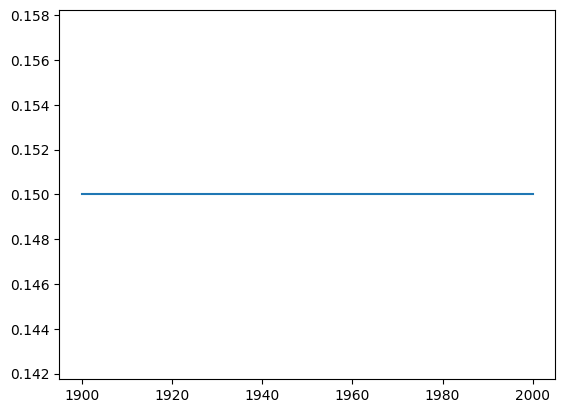

[1900, 2000]
[0.15, 0.15]


In [36]:
x = fire_load_list[::-1]
y = pf_list[::-1]
plt.plot(x, y)
plt.show()
print(x)
print(y)

In [7]:
# pf_list = [0.24, 0.14, 0.1, 0.08, 0.04, 0.04, 0.04, 0.0]

In [8]:
# plt.plot(fire_loads[:8], pf_list)
# plt.show()

In [9]:
# os.chdir(destination)
# command = "/Applications/quoFEM.app/Contents/MacOS/applications/dakota/bin/dakota -input dakota.in -output dakota.out -error dakota.err"
# command_list = shlex.split(command)
# subprocess.run(command_list)
# pf = extract_failure_probability()
# pf_list[num] = pf
# print(pf)
# os.chdir(destination.parent)
# shutil.rmtree(destination, ignore_errors=True)


In [10]:
print(os.getcwd())
print(destination)
print(destination.parent)

/Users/emilynakamura/Downloads/NHERI/Technical/REU2024/src/fragility
/Users/emilynakamura/Downloads/NHERI/Technical/REU2024/src/fragility/analysis_1
/Users/emilynakamura/Downloads/NHERI/Technical/REU2024/src/fragility


In [11]:
# os.chdir(destination.parent)

In [12]:
# # emily numpy, but sig fig prom
# file = "dakotaTab.out"
# with open(file, 'r') as file:
#     data = file.readlines()

# array = []
# for line in data[1:]:  # Skip the first line
#     values = line.split()
#     row = [float(value) for value in values[2:]]  # Convert values from index 2 onwards to float
#     array.append(row)

# numpy_array = np.array(array)
# print(numpy_array)

# row_index = 1  # Replace with the row index you want to access
# col_index = 3  # Replace with the column index you want to access

# # Access the value
# specific_value = numpy_array[row_index, col_index]
# print(f"The value at row {row_index + 1} and column {col_index + 1} is {specific_value}")

In [13]:
# # emily pandas, but sig fig problem
# import pandas as pd

# # Define the filename
# filename = "dakotaTab.out"  # Replace with your actual file name

# # Read the file into a DataFrame
# df = pd.read_csv(filename, delim_whitespace=True, converters={'interface': str})

# # Display the DataFrame
# pd.set_option('display.precision', 15)
# print("DataFrame:")
# print(df)

# numpy_array = df.iloc[:, 2:].to_numpy()  # Skip the first two columns

# # Display the NumPy array
# print("\nNumPy array:")
# print(numpy_array)


In [14]:
# df = pd.read_csv("dakotaTab.out", delimiter="\t").to_numpy()
# df = df[:, 2:]

In [15]:
# data = np.genfromtxt("dakotaTab.out", delimiter='\t', skip_header=1)

In [16]:
# display(df)


In [17]:
# df